**1. Charger les données**

Tout d'abord, nous devons charger les données du fichier CSV contenant les URLs malveillantes. Nous pouvons utiliser la bibliothèque pandas pour charger les données à partir du fichier CSV.

In [78]:
import pandas as pd

data = pd.read_csv("malicious_phish.csv")
data.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


**2. Afficher les statistiques de ces données**

Nous pouvons utiliser la fonction  data.info() permet d'obtenir des informations sur les colonnes et les types de données dans un DataFrame.

In [79]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB
None


compter le nombre d'occurrences de chaque valeur dans la colonne "type" du dataframe

In [80]:
compt = data.type.value_counts()
compt

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

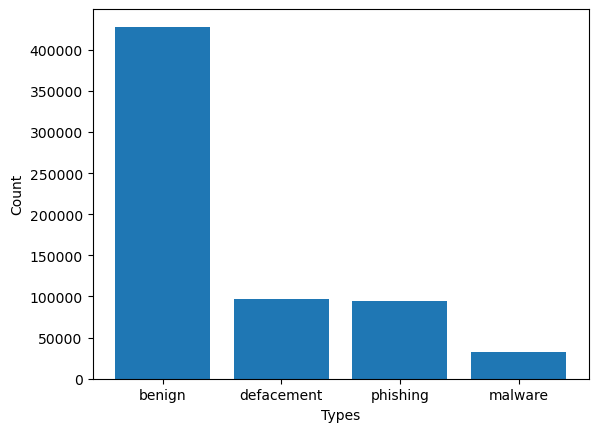

In [81]:

import matplotlib.pyplot as plt
plt.bar(compt.index, compt)
plt.xlabel('Types')
plt.ylabel('Count')
plt.show()


**3. Créer un modèle de régression logistique**

Ajouter une nouvelle colonne appelée "Category", contenant des valeurs basées sur la colonne "type" actuelle dans le DataFrame.

In [82]:
rem = {"Category": {"benign": 0, "defacement": 1, "phishing":2, "malware":3}}
data['Category'] = data['type']
data = data.replace(rem)

Calcule la longueur de chaque URL dans les données

In [83]:

data['url_len'] = data['url'].apply(lambda x: len(str(x)))
data.head()

,url,type,Category,url_len
0,br-icloud.com.br,phishing,2,16
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235


In [84]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

def model(X):
    y = data['Category']


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    model = LogisticRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)


In [85]:

X = data[['url_len']]
model(X)


In [86]:
print ("----------------------------------")
print("Précision :", accuracy*100,"%")

----------------------------------
Précision : 80.95701225442521 %


La précision ne suffit pas, il faut ajouter d'autres facteurs



**__________________________________________**

Compte le nombre de caractères spéciaux dans chaque URL

In [87]:
import numpy as np


feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']

counts = data['url'].apply(lambda i: [i.count(a) for a in feature])
sum_column = np.zeros((counts.shape[0], 1))


for i in range(counts.shape[0]):
     row_sum = np.sum(counts.iloc[i])
     sum_column[i, 0] = row_sum

counts_df = pd.DataFrame(sum_column, columns=["char_feature"])
data = pd.concat([data, counts_df], axis=1)

data.head()

,url,type,Category,url_len,char_feature
0,br-icloud.com.br,phishing,2,16,3.0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,2.0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,2.0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,10.0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,8.0


In [ ]:
X = data[['url_len','char_feature']]
model(X)

In [89]:
print ("----------------------------------")
print("Précision :", accuracy*100,"%")

----------------------------------
Précision : 80.95701225442521 %


La précision ne suffit pas, il faut ajouter d'autres facteurs


**__________________________________________**

 Calcule la longueur du premier répertoire dans chaque URL

In [90]:
from urllib.parse import urlparse

def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

data['fd_length'] = data['url'].apply(lambda i: fd_length(i))

data.head()

,url,type,Category,url_len,char_feature,fd_length
0,br-icloud.com.br,phishing,2,16,3.0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,2.0,5
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,2.0,7
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,10.0,9
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,8.0,9


In [ ]:
X = data[['url_len','char_feature','fd_length']]
model(X)

In [92]:
print ("----------------------------------")
print("Précision :", accuracy*100,"%")

----------------------------------
Précision : 80.95701225442521 %


La précision ne suffit pas, il faut ajouter d'autres facteurs


**__________________________________________**

Calcule la longueur du nom d'hôte dans chaque URL

In [93]:
data['hostname_length'] = data['url'].apply(lambda i: len(urlparse(i).netloc))
data.head()

,url,type,Category,url_len,char_feature,fd_length,hostname_length
0,br-icloud.com.br,phishing,2,16,3.0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,2.0,5,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,2.0,7,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,10.0,9,21
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,8.0,9,23


In [ ]:
X = data[['url_len','char_feature','fd_length','hostname_length']]
model(X)

In [95]:
print ("----------------------------------")
print("Précision :", accuracy*100,"%")

----------------------------------
Précision : 80.95701225442521 %


La précision ne suffit pas, il faut ajouter d'autres facteurs


**__________________________________________**

Compte le nombre de répertoires dans chaque URL

In [96]:
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
data['count_dir'] = data['url'].apply(lambda i: no_of_dir(i))
data.head()

,url,type,Category,url_len,char_feature,fd_length,hostname_length,count_dir
0,br-icloud.com.br,phishing,2,16,3.0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,2.0,5,0,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,2.0,7,0,3
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,10.0,9,21,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,8.0,9,23,1


In [ ]:
X = data[['url_len','char_feature','fd_length','hostname_length','count_dir']]
model(X)

In [98]:
print ("----------------------------------")
print("Précision :", accuracy*100,"%")

----------------------------------
Précision : 80.95701225442521 %


La précision ne suffit pas, il faut ajouter d'autres facteurs


**__________________________________________**

Compte le nombre de chiffres dans chaque URL

In [99]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
data['count-digits']= data['url'].apply(lambda i: digit_count(i))

data.head()

,url,type,Category,url_len,char_feature,fd_length,hostname_length,count_dir,count-digits
0,br-icloud.com.br,phishing,2,16,3.0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,2.0,5,0,2,1
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,2.0,7,0,3,1
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,10.0,9,21,1,7
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,8.0,9,23,1,22


In [ ]:
X = data[['url_len','char_feature','fd_length','hostname_length','count_dir','count-digits']]
model(X)

In [101]:
print ("----------------------------------")
print("Précision :", accuracy*100,"%")

----------------------------------
Précision : 80.95701225442521 %


La précision suffit presque

**4. Valider le modèle**

Précision : 80.95701225442521 %
-----------------------------------
rappel :
               precision    recall  f1-score   support

           0       0.84      0.98      0.91    128883
           1       0.78      0.85      0.81     28602
           2       0.31      0.08      0.13     28205
           3       0.81      0.56      0.67      9668

    accuracy                           0.81    195358
   macro avg       0.69      0.62      0.63    195358
weighted avg       0.75      0.81      0.77    195358

-----------------------------------


Text(0, 0.5, 'True tumor class')

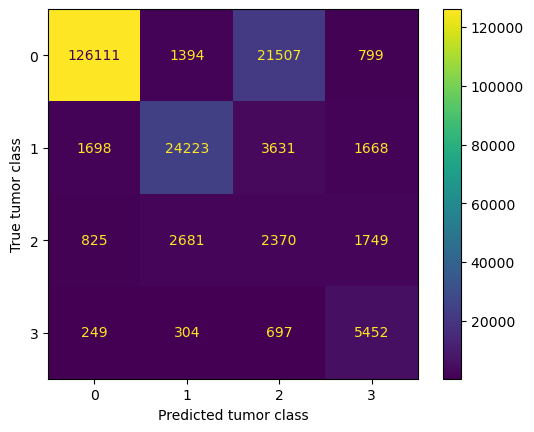

In [102]:
from sklearn.metrics import accuracy_score,classification_report, roc_auc_score,ConfusionMatrixDisplay

# Précision
accuracy = accuracy_score(y_test, y_pred)
print("Précision :", accuracy*100,"%")

print("-----------------------------------")

# rappel
report = classification_report(y_test, y_pred)
print("rappel :\n", report)

print("-----------------------------------")


# assuming classifier, x_test and y_test are already defined
cm_display = ConfusionMatrixDisplay.from_predictions(y_pred, y_test)
plt.xlabel("Predicted tumor class")
plt.ylabel("True tumor class")

Après avoir étudié un modèle avec différents facteurs et atteint 80 % de précision, il est considéré comme presque suffisant, malgré cela, il n'est toujours pas suffisant pour être considéré comme une mesure de base car le taux d'erreur n'est pas non plus faible.